En primer lugar se leen los datos del archivo, corrigiendo el formato de separacion, de ';' a ','.

In [1]:
import pandas as pd

raw_dataset = pd.read_csv('Calidad_de_agus_2023.csv', delimiter=';')

raw_dataset

,orden,sitios,codigo,fecha,año,campaña,tem_agua,tem_aire,od,ph,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,1,Canal Villanueva y Río Luján,TI001,22/2/2023,2023,Verano,26,24,6.59,7.24,...,<2.0,<30,29,<0.10,<0.005,<0.001,0.87,<0.15,53,Muy deteriorada
1,1,Canal Villanueva y Río Luján,TI001,10/5/2023,2023,otoño,18,12,7.09,7.22,...,<2.0,<30,45.00,<0.10,<0.005,<1.0,2.56,<0.15,39,Extremadamente deteriorada
2,1,Canal Villanueva y Río Luján,TI001,23/8/2023,2023,invierno,16.3,11,8.53,7.27,...,<2.0,<30,38,<0.10,<0.005,<0.001,1.02,<0.15,48,Muy deteriorada
3,1,Canal Villanueva y Río Luján,TI001,14/11/2023,2023,primavera,23,25,4.72,6.57,...,<2.0,<30,24,<0.10,<0.005,<0.001,<10.00,<0.15,42,Extremadamente deteriorada
4,2,Río Lujan y Arroyo Caraguatá,TI006,22/2/2023,2023,Verano,26.8,25,5.94,6.96,...,2.1,<30,24,<0.10,<0.005,<0.001,10.61,0.21,39,Extremadamente deteriorada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,42,Balneario Municipal,BS094,23/8/2023,2023,invierno,12,13,9.41,8.67,...,2.3,66,75,<0.10,<0.005,<0.001,19.25,<0.15,36,Extremadamente deteriorada
165,42,Playa La Balandra,BS093,22/2/2023,2023,Verano,20,23,5.8,7.47,...,3.4,58,17,<0.10,<0.005,<0.001,<0.10,>5.00,no se pudo calcular,NaN
166,42,Playa La Balandra,BS093,10/5/2023,2023,otoño,18,13,5.93,8.35,...,2.10,<30,32.00,<0.10,<0.005,<1.0,54.87,<0.15,36,Extremadamente deteriorada
167,42,Playa La Balandra,BS093,14/11/2023,2023,primavera,20,14,8.22,8.30,...,<2.0,48,110,<0.10,0,<0.001,37.4,<0.15,35,Extremadamente deteriorada


Hacemos un head para ver de que tratan los datos.

In [2]:
raw_dataset.head()

,orden,sitios,codigo,fecha,año,campaña,tem_agua,tem_aire,od,ph,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,1,Canal Villanueva y Río Luján,TI001,22/2/2023,2023,Verano,26,24,6.59,7.24,...,<2.0,<30,29,<0.10,<0.005,<0.001,0.87,<0.15,53,Muy deteriorada
1,1,Canal Villanueva y Río Luján,TI001,10/5/2023,2023,otoño,18,12,7.09,7.22,...,<2.0,<30,45.00,<0.10,<0.005,<1.0,2.56,<0.15,39,Extremadamente deteriorada
2,1,Canal Villanueva y Río Luján,TI001,23/8/2023,2023,invierno,16.3,11,8.53,7.27,...,<2.0,<30,38,<0.10,<0.005,<0.001,1.02,<0.15,48,Muy deteriorada
3,1,Canal Villanueva y Río Luján,TI001,14/11/2023,2023,primavera,23,25,4.72,6.57,...,<2.0,<30,24,<0.10,<0.005,<0.001,<10.00,<0.15,42,Extremadamente deteriorada
4,2,Río Lujan y Arroyo Caraguatá,TI006,22/2/2023,2023,Verano,26.8,25,5.94,6.96,...,2.1,<30,24,<0.10,<0.005,<0.001,10.61,0.21,39,Extremadamente deteriorada


Borramos las columas orden, codigo y año ya que no aportan nada al analisis.

In [3]:
raw_dataset = raw_dataset.drop('orden', axis=1)
raw_dataset = raw_dataset.drop('codigo', axis=1)
raw_dataset = raw_dataset.drop('año', axis=1)


Ahora en busca de nulos por columna.

In [4]:
raw_dataset.isna().sum()

sitios                      0
fecha                       0
campaña                     0
tem_agua                    0
tem_aire                    0
od                          0
ph                          1
olores                      0
color                       0
espumas                     0
mat_susp                    0
colif_fecales_ufc_100ml     0
escher_coli_ufc_100ml       0
enteroc_ufc_100ml           0
nitrato_mg_l                0
nh4_mg_l                    0
p_total_l_mg_l              1
fosf_ortofos_mg_l           0
dbo_mg_l                    1
dqo_mg_l                    0
turbiedad_ntu               0
hidr_deriv_petr_ug_l        0
cr_total_mg_l               0
cd_total_mg_l               0
clorofila_a_ug_l            0
microcistina_ug_l           0
ica                         1
calidad_de_agua            15
dtype: int64

Vemos en cada una de las columnas que valores toman.

In [5]:
#se revisa una por una las columnas
#lo que esta entre corchetes se fue cambiando entre todas las variables para ver que valores aparecen

for idx, val in raw_dataset["od"].value_counts().items():
  print(idx, val)

sin equipo 12
no muestreó 7
no se midió 5
en obra 4
no se muestreó 4
6.3 3
6.4 2
5.4 2
8.53 2
5.94 2
7.60 2
N/R 2
6.33 2
inaccesible 2
5.85 2
5.02 2
7.09 1
6.59 1
5.36 1
2.01 1
5.26 1
4.13 1
2.67 1
3.45 1
5.88 1
3.1 1
1.95 1
6.7 1
6.16 1
6.14 1
6.88 1
2.62 1
4.72 1
7.12 1
7.74 1
7.82 1
5.19 1
4.15 1
8.72 1
8.09 1
6.5 1
5.65 1
5.61 1
5.16 1
6.66 1
6.69 1
3.24 1
6.32 1
7.64 1
2.94 1
8.27 1
4.86 1
6.37 1
6.60 1
5.20 1
8.15 1
6.95 1
6.79 1
7.41 1
4.88 1
4.31 1
5.97 1
6.08 1
5.75 1
2.98 1
5.28 1
2.20 1
5.14 1
5.07 1
8 1
5.57 1
5.58 1
0.6 1
3.03 1
3.33 1
1.2 1
5.22 1
4.85 1
4.99 1
5.24 1
7.9 1
6.20 1
0.96 1
1.22 1
1.99 1
3.02 1
3.22 1
1.1 1
2.64 1
4.45 1
6.82 1
5.55 1
9.88 1
5.70 1
9.3 1
7.23 1
3.55 1
8.4 1
11.49 1
8.11 1
7.13 1
12.62 1
8.28 1
2.68 1
4.24 1
8.44 1
5.48 1
8.57 1
6.13 1
5.63 1
7.43 1
0.2 1
6.24 1
9.05 1
4.76 1
8.99 1
5.92 1
11.70 1
7.51 1
6.65 1
10.88 1
4.53 1
7.53 1
10.02 1
9.78 1
9.41 1
5.8 1
5.93 1
8.22 1
8.96 1


Remplazamos por nulos los valores que no nos interesan, es decir, no nos aportan informacion relevante.

In [6]:
import pandas as pd

# Copiar el dataset
preprocessed_dataset = raw_dataset.copy()

# Lista de valores a reemplazar por pd.NA
valores_a_reemplazar = ['sin equipo', 'no muestreó', 'no se midió', 'en obra', 'no se muestreó',
                        'inaccesible', 'sin muestra', 'envase sin muestra', 'falto un frasco',
                        'Dato atípico', 'no se pudo calcular', 'N/R', 'no funcionó', '-', 'N/A', '', ' ']

# Lista de columnas a las que se les debe aplicar el reemplazo
columnas_a_procesar = [
    'tem_agua', 'tem_aire', 'od', 'ph', 'olores', 'color', 'espumas', 'mat_susp', 
    'colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 
    'nitrato_mg_l', 'nh4_mg_l', 'p_total_l_mg_l', 'fosf_ortofos_mg_l', 
    'dbo_mg_l', 'dqo_mg_l', 'turbiedad_ntu', 'hidr_deriv_petr_ug_l', 'cr_total_mg_l',
    'cd_total_mg_l', 'clorofila_a_ug_l', 'microcistina_ug_l', 'ica', 'calidad_de_agua'
]

# Recorrer todas las columnas y aplicar el reemplazo
for columna in columnas_a_procesar:
    preprocessed_dataset[columna] = preprocessed_dataset[columna].replace(valores_a_reemplazar, pd.NA)


Ahora vamos a borrar aquellas filas que quedaron con muchos nulos, ya que no nos van a servir para el analisis. Estas filas borradas son aquellas con mas de 23 valores nulos, que corresponden a las muestras donde no se realizaron observaciones.

In [7]:

preprocessed_dataset = preprocessed_dataset.dropna(thresh=len(preprocessed_dataset.columns) - 23)

Luego definimos las columnas que van a ser de tipo cuantitativos y de fecha, eliminando los simbolos "<" o ">" en los valores que los porten.

In [8]:
columnas_a_convertir = ['tem_agua', 'tem_aire', 'od', 'ph', 'colif_fecales_ufc_100ml',
                         'escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 'nitrato_mg_l', 'nh4_mg_l',
                         'p_total_l_mg_l', 'fosf_ortofos_mg_l', 'dbo_mg_l', 'dqo_mg_l', 'turbiedad_ntu',
                         'cr_total_mg_l', 'cd_total_mg_l', 'clorofila_a_ug_l',
                         'microcistina_ug_l', 'ica']

for col in columnas_a_convertir:
    preprocessed_dataset[col] = preprocessed_dataset[col].str.replace('<', '').str.replace('>', '')
    preprocessed_dataset[col] = pd.to_numeric(preprocessed_dataset[col])

preprocessed_dataset['fecha'] = pd.to_datetime(preprocessed_dataset['fecha'], format="%d/%m/%Y")

Transformamos el tipo de dato de determinadas columnas para poder trabajar con las variables cualitativas.

In [9]:
#Transformacion campaña
preprocessed_dataset['campaña']=preprocessed_dataset['campaña'].replace(['Verano','otoño','invierno','primavera'],['0','1','2','3'])

#transformacion olores, color, espumas,mat_susp
preprocessed_dataset['olores']=preprocessed_dataset['olores'].replace(['Ausencia','Presencia'],['0','1'])
preprocessed_dataset['color']=preprocessed_dataset['color'].replace(['Ausencia','Presencia'],['0','1'])
preprocessed_dataset['espumas']=preprocessed_dataset['espumas'].replace(['Ausencia','Presencia'],['0','1'])
preprocessed_dataset['mat_susp']=preprocessed_dataset['mat_susp'].replace(['Ausencia','Presencia'],['0','1'])

#transformacion calidad_de_agua
preprocessed_dataset['calidad_de_agua']=preprocessed_dataset['calidad_de_agua'].replace(['Muy deteriorada','Muy deteriorada ','Extremadamente deteriorada'],['0','0','1'])

columnas_cualitativas = ['campaña', 'olores', 'color', 'espumas', 'mat_susp', 'calidad_de_agua']
preprocessed_dataset[columnas_cualitativas] = preprocessed_dataset[columnas_cualitativas].apply(pd.to_numeric, errors='coerce')

Analizamos el porcentaje de nulos en cada columna para ver si las eliminabamos. Como en ninguna de las columnas hay presencia de nulos mayor o igual al 60% las conservamos.

In [10]:
columnas_totales = columnas_a_convertir.copy()
columnas_totales.extend(columnas_cualitativas)

for col in columnas_totales:
    if ((preprocessed_dataset[col].isna().sum() / len(preprocessed_dataset[col]))*100 >= 60):
        print(col)

Notamos que solo hay un tipo de valor en la columna hidr_deriv_petr_ug_l, por lo que la quitamos al ser constante a lo largo de las mediciones.

In [11]:
preprocessed_dataset['hidr_deriv_petr_ug_l'].value_counts()

hidr_deriv_petr_ug_l
<0.10    150
Name: count, dtype: int64

In [12]:
preprocessed_dataset = preprocessed_dataset.drop('hidr_deriv_petr_ug_l', axis=1)

De acuerdo a la columna, realizamos imputaciones con la tecnica de los n vecinos mas cercanos, eligiendo los dos mas cercanos, para suprimir los valores nulos restantes.

In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 2, weights = "uniform")


preprocessed_dataset_imputado = preprocessed_dataset[columnas_totales]
dataset_imputado = imputer.fit_transform(preprocessed_dataset_imputado)

preprocessed_dataset[columnas_totales] = dataset_imputado

----------------------------------------------------

Veamos las correlaciones entre los datos ya preprocesados, a ver si vemos algo que supera nuestra regla del pulgar de 0.7 en coeficiente de correlacion (numero elegido por conveniencia). Para estas correlaciones los stios y fechas no los consideramos al no ser valores numericos.

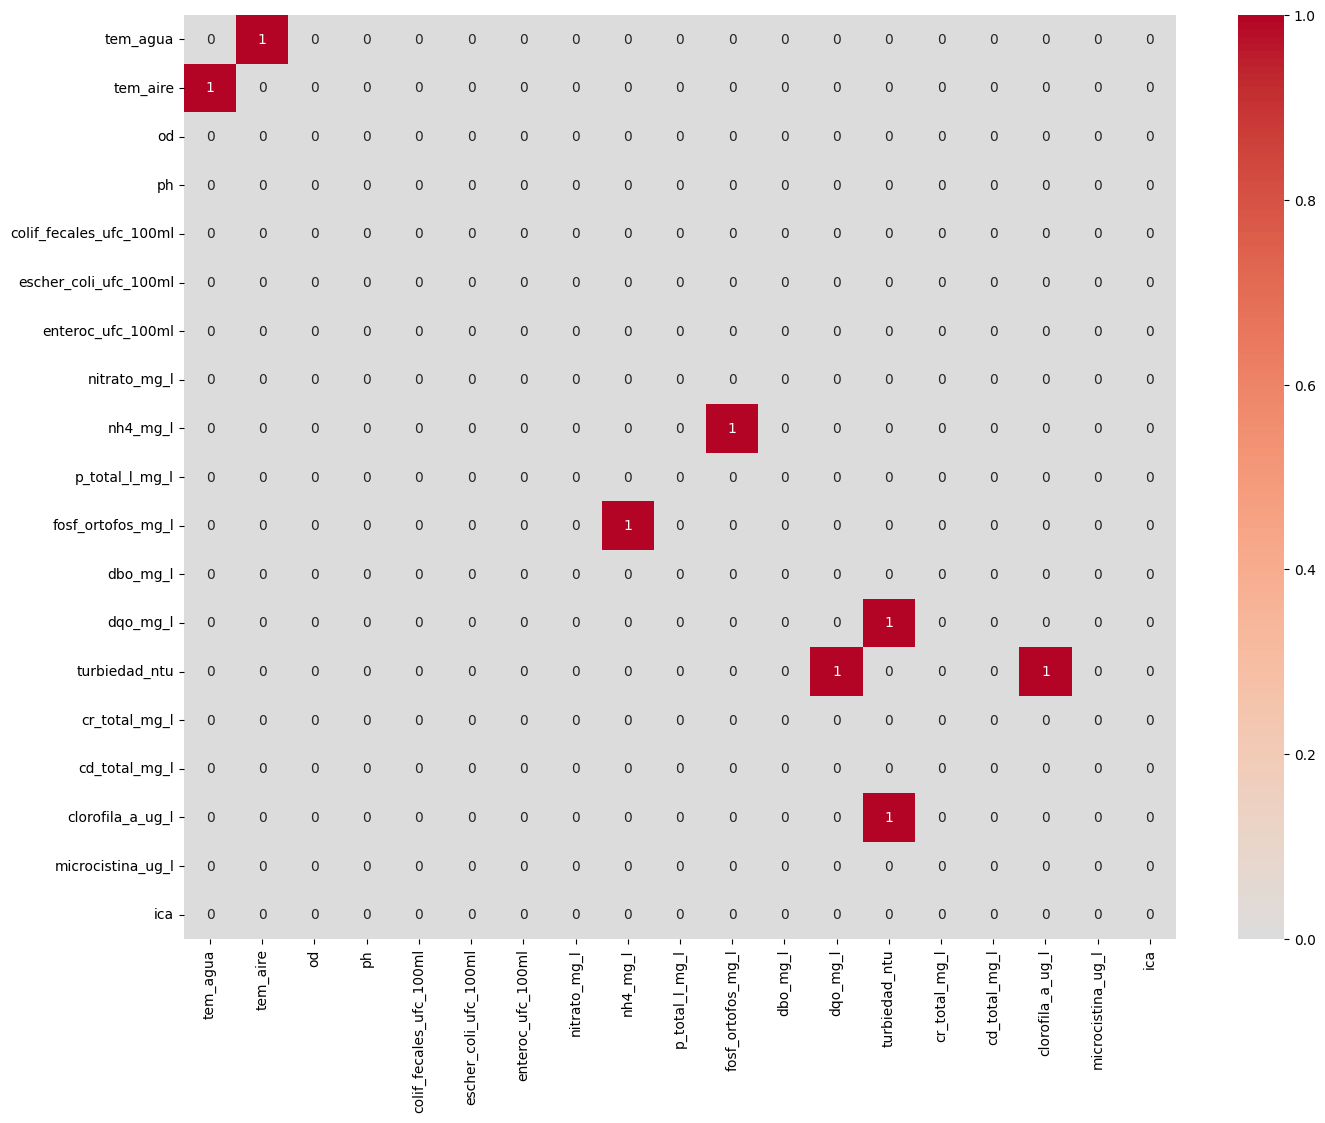

In [14]:
cosas = ['sitios','fecha']
preprocessed_dataset_fijarse = preprocessed_dataset.drop(cosas, axis = 1)
preprocessed_dataset_fijarse = preprocessed_dataset_fijarse.drop(columnas_cualitativas, axis = 1)

correlation_matrix = preprocessed_dataset_fijarse.corr()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.7
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.7
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Como vemos, tenemos correlaciones con coeficiente superior o igual al valor esperado entre: 

- Temperatura del agua y temperatura del aire.

- Concentracion de ortofosfatos en miligramos por ml y concentracion de amoniaco en miligramos por ml.

- Turbidez del agua y clorofila en microgramos por litro.

- Turbidez del agua y demanda qimica de oxigeno en miligramos por ml.

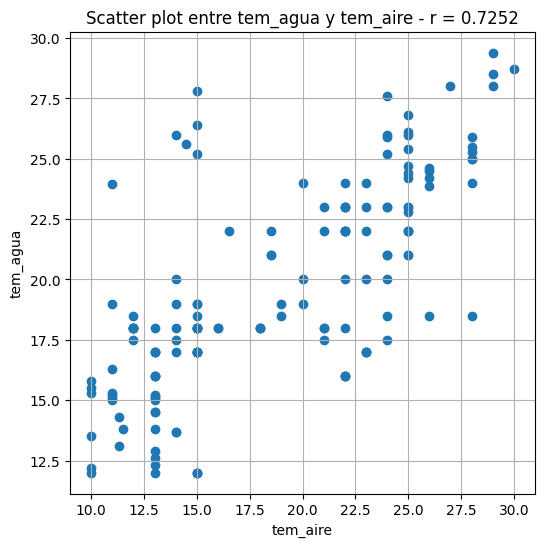

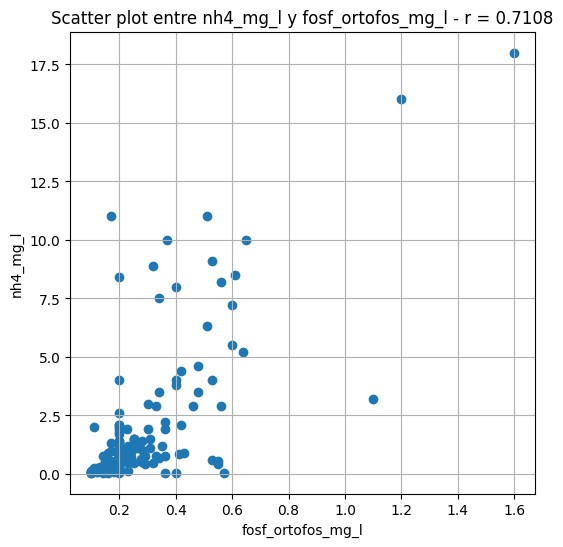

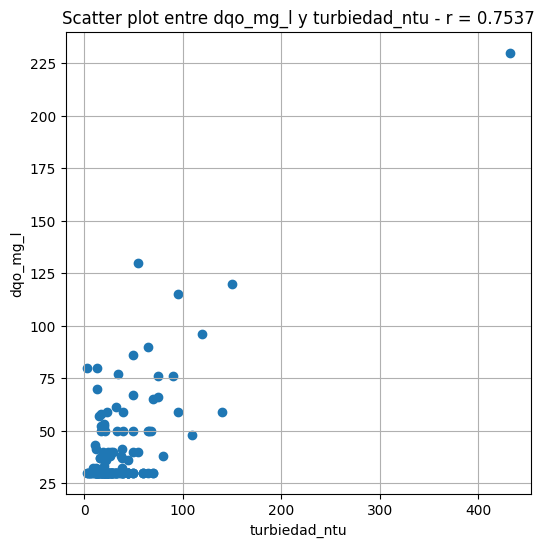

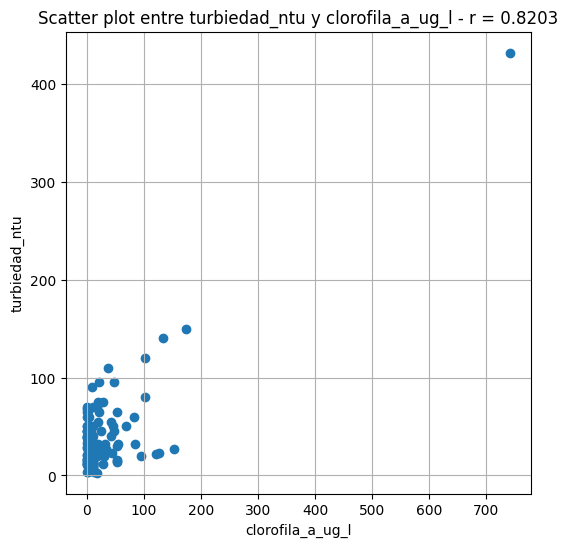

In [15]:
# iteramos por cada una de las columnas
for i, col in enumerate(correlation_matrix_umbralizada.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(6, 6))
      plt.scatter(preprocessed_dataset_fijarse[row], preprocessed_dataset_fijarse[col])
      # y lo mostramos bonito
      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

Vemos unos posibles outliers en los scatter plots, veamos como se ve por ejemplo el del ultimo caso.

In [16]:
preprocessed_dataset = preprocessed_dataset[preprocessed_dataset['clorofila_a_ug_l']<740]

Eliminando esta fila, que contiene un outlier en casi todos los scatterplots, se emprolijan bastante los graficos.

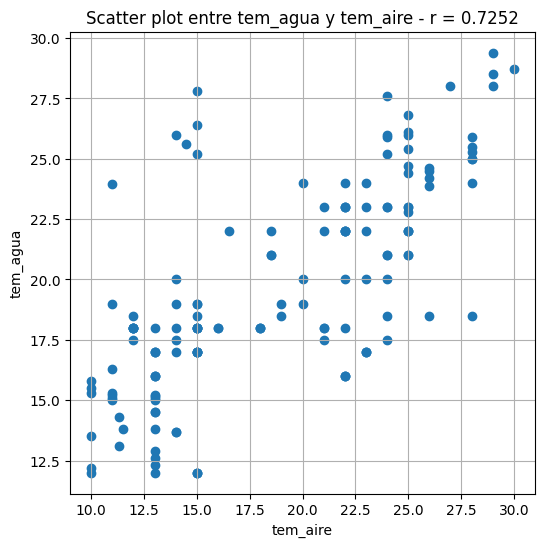

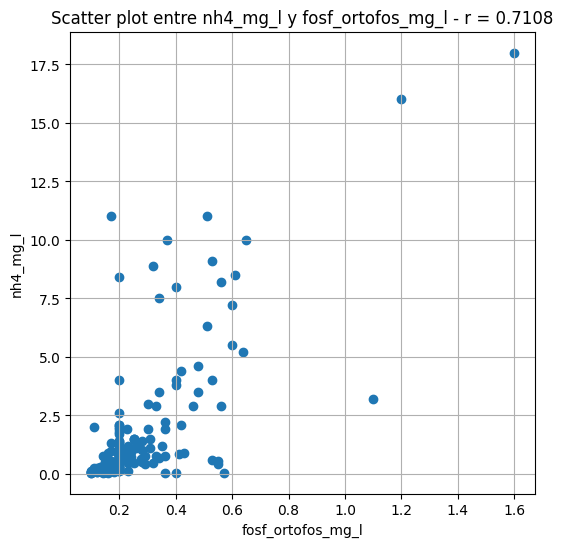

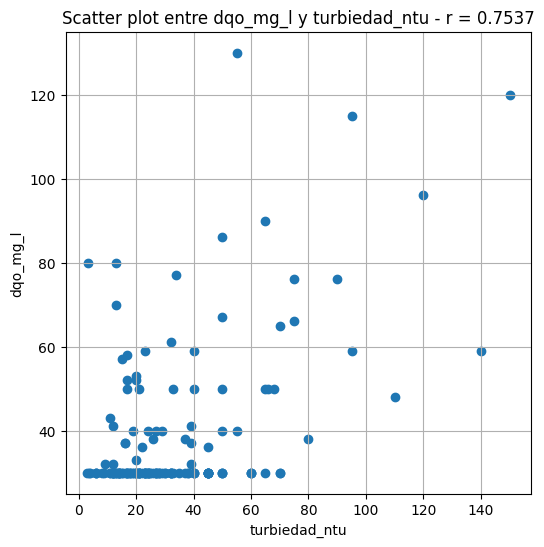

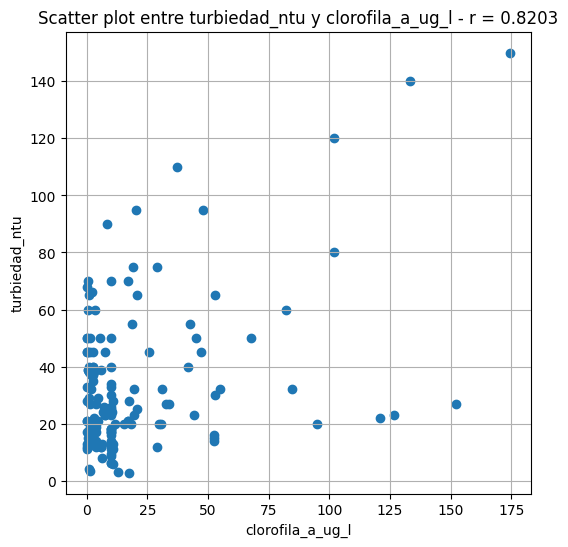

In [17]:
# iteramos por cada una de las columnas
for i, col in enumerate(correlation_matrix_umbralizada.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(6, 6))
      plt.scatter(preprocessed_dataset[row], preprocessed_dataset[col])
      # y lo mostramos bonito
      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

Veamos como varian los puntos considerando las estaciones en las que se tomaron las mediciones a ver si hay variaciones por la epoca.

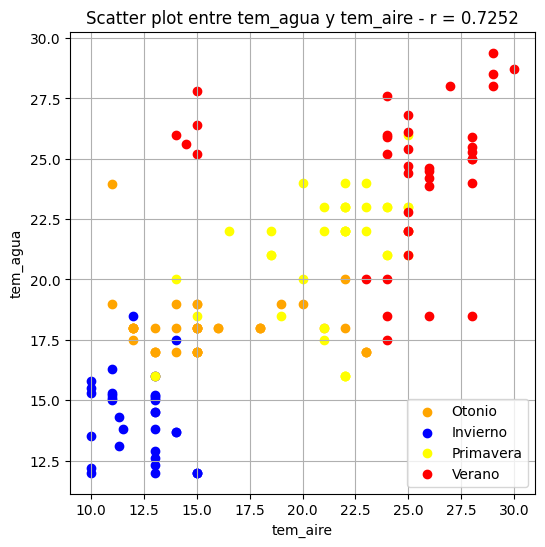

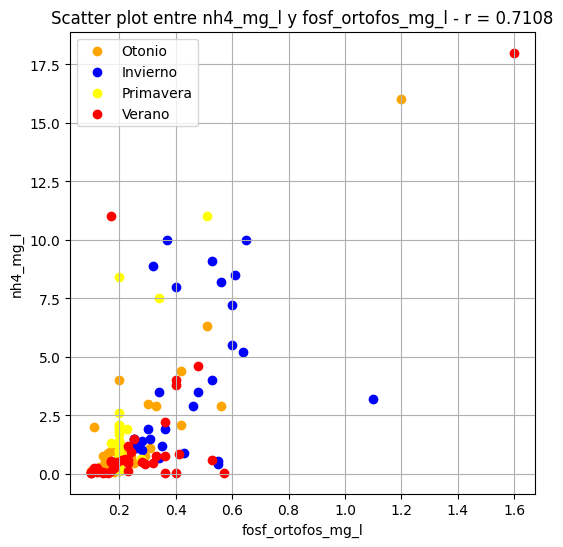

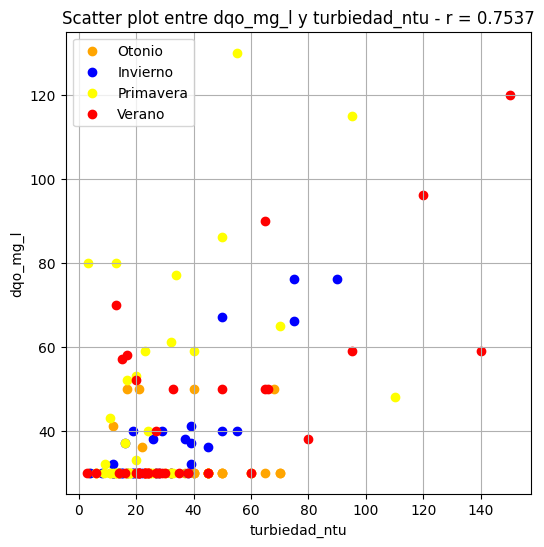

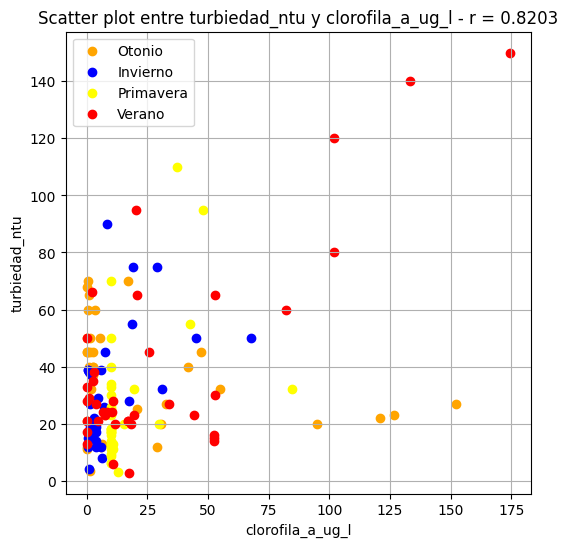

In [18]:
camp_verano = preprocessed_dataset[preprocessed_dataset["campaña"] == 0]
camp_otonio = preprocessed_dataset[preprocessed_dataset["campaña"] == 1]
camp_invierno = preprocessed_dataset[preprocessed_dataset["campaña"] == 2]
camp_primavera = preprocessed_dataset[preprocessed_dataset["campaña"] == 3]

# iteramos por cada una de las columnas
for i, col in enumerate(correlation_matrix_umbralizada.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(6, 6))

      plt.scatter(camp_otonio[row], camp_otonio[col], color="orange", label="Otonio")
      plt.scatter(camp_invierno[row], camp_invierno[col], color="blue", label="Invierno")
      plt.scatter(camp_primavera[row], camp_primavera[col], color="yellow", label="Primavera")
      plt.scatter(camp_verano[row], camp_verano[col], color="red", label="Verano")

      plt.legend()
      # y lo mostramos bonito
      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

Vemos claramente una relacion entre la estacion y las temperaturas del auga y aire, cosa esperable. Pero tambien tenemos una posible relacion entre las concentraciones de amoniaco y ortofosfatos respecto a la estacion del anio, ampliemos en esto.

C:\Users\kevin\AppData\Local\Temp\ipykernel_11076\1232858801.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([preprocessed_dataset[preprocessed_dataset["campaña"] == 0]['nh4_mg_l'],


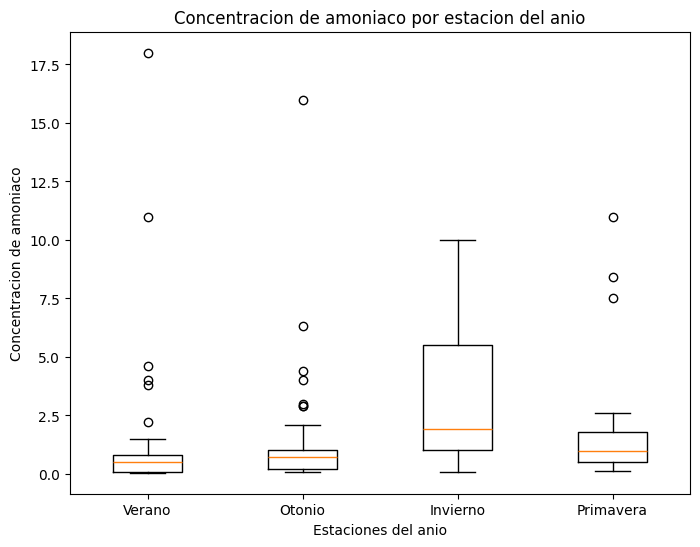

C:\Users\kevin\AppData\Local\Temp\ipykernel_11076\1232858801.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([preprocessed_dataset[preprocessed_dataset["campaña"] == 0]['fosf_ortofos_mg_l'],


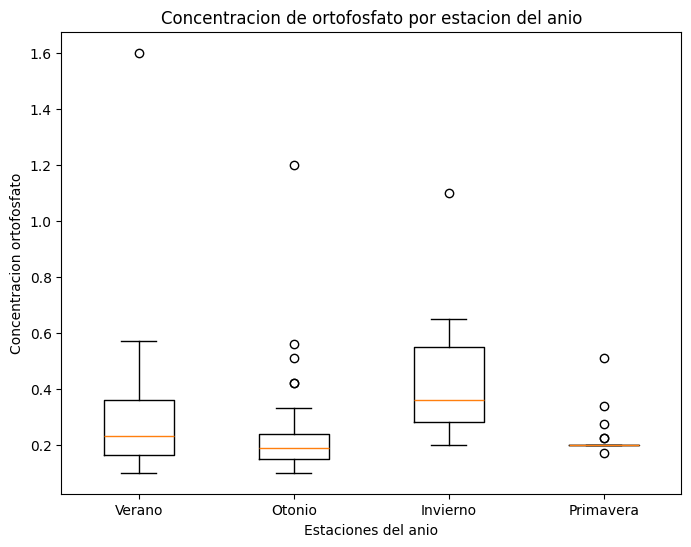

In [19]:
plt.figure(figsize=(8, 6))
plt.boxplot([preprocessed_dataset[preprocessed_dataset["campaña"] == 0]['nh4_mg_l'],
             preprocessed_dataset[preprocessed_dataset["campaña"] == 1]['nh4_mg_l'],
             preprocessed_dataset[preprocessed_dataset["campaña"] == 2]['nh4_mg_l'],
             preprocessed_dataset[preprocessed_dataset["campaña"] == 3]['nh4_mg_l']],
             labels=["Verano", "Otonio", "Invierno", "Primavera"])

# Agregar etiquetas a los ejes
plt.xlabel("Estaciones del anio")
plt.ylabel("Concentracion de amoniaco")

# Agregar un título al gráfico
plt.title("Concentracion de amoniaco por estacion del anio")

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot([preprocessed_dataset[preprocessed_dataset["campaña"] == 0]['fosf_ortofos_mg_l'],
             preprocessed_dataset[preprocessed_dataset["campaña"] == 1]['fosf_ortofos_mg_l'],
             preprocessed_dataset[preprocessed_dataset["campaña"] == 2]['fosf_ortofos_mg_l'],
             preprocessed_dataset[preprocessed_dataset["campaña"] == 3]['fosf_ortofos_mg_l']],
             labels=["Verano", "Otonio", "Invierno", "Primavera"])

# Agregar etiquetas a los ejes
plt.xlabel("Estaciones del anio")
plt.ylabel("Concentracion ortofosfato")

# Agregar un título al gráfico
plt.title("Concentracion de ortofosfato por estacion del anio")

# Mostrar el gráfico
plt.show()

Vemos un claro aumento de ambas concentracines en invierno. 

Separandolas, respecto a la concentracion de ortofosfato vemos a su vez un aumento en verano, y en la concentracion de amoniaco en primavera.

Hagamos una primera hipotesis, consideramos que la concentracion de amoniaco en la medicion varia segun la estacion del anio en el que se realizo. Utilizaremos un intervalo de confianza del 0.05 dicho sea de paso.

In [20]:
from scipy.stats import shapiro
import scipy.stats as stats

caso_otonio = preprocessed_dataset[preprocessed_dataset["campaña"] == 1]['nh4_mg_l']
caso_invierno = preprocessed_dataset[preprocessed_dataset["campaña"] == 2]['nh4_mg_l']
caso_primavera = preprocessed_dataset[preprocessed_dataset["campaña"] == 3]['nh4_mg_l']
caso_verano = preprocessed_dataset[preprocessed_dataset["campaña"] == 0]['nh4_mg_l']

stat, p = shapiro(caso_otonio)
print(f"Test de Shapiro-Wilk para caso otonio: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(caso_invierno)
print(f"Test de Shapiro-Wilk para caso invierno: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(caso_primavera)
print(f"Test de Shapiro-Wilk para caso primavera: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(caso_verano)
print(f"Test de Shapiro-Wilk para caso verano: Estadístico={stat:.3f}, p-valor={p:.3f}")


stat, p = stats.levene(caso_otonio, caso_invierno, caso_primavera, caso_verano)
print(f"Test de Levene para nh4_mg_l: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para caso otonio: Estadístico=0.495, p-valor=0.000
Test de Shapiro-Wilk para caso invierno: Estadístico=0.832, p-valor=0.000
Test de Shapiro-Wilk para caso primavera: Estadístico=0.571, p-valor=0.000
Test de Shapiro-Wilk para caso verano: Estadístico=0.444, p-valor=0.000
Test de Levene para nh4_mg_l: Estadístico=2.326, p-valor=0.077


Claramente ningun valor de p supera nuestro nivel de confianza de 0.05 en el test Shapiro, por mas que el test Levene tenga un valor superior a 0.05 no pudiendo descartar la homogeneidad de varianzas, por lo que no hay distribucion normal.

Haremos un test de hipotesis no paramentrico por lo anterior, el de Kruskal-Wallis, la hipotesis nula es que no se relaciona la concentracion de amoniaco con la estacion del anio cuando se realizo la medicion.

In [21]:
stat, p = stats.kruskal(caso_otonio, caso_invierno, caso_primavera, caso_verano)

print(f"Test de Kruskal-Wallis para nh4_mg_l: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la concentracion de amoniaco por estacion del anio cuando se midio.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la concentracion de amoniaco por estacion del anio cuando se midio.")

Test de Kruskal-Wallis para nh4_mg_l: Estadístico=26.615, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la concentracion de amoniaco por estacion del anio cuando se midio.


Veamos una siguiene hipotesis similar a la anterior, la concentracion de ortofosfato tiene una presencia diferente dependiendo la estacion del anio cuando se realizo la medicion. Nuevamente, intervalo de confianza de 0.05.

In [22]:
caso_otonio = preprocessed_dataset[preprocessed_dataset["campaña"] == 1]['fosf_ortofos_mg_l']
caso_invierno = preprocessed_dataset[preprocessed_dataset["campaña"] == 2]['fosf_ortofos_mg_l']
caso_primavera = preprocessed_dataset[preprocessed_dataset["campaña"] == 3]['fosf_ortofos_mg_l']
caso_verano = preprocessed_dataset[preprocessed_dataset["campaña"] == 0]['fosf_ortofos_mg_l']

stat, p = shapiro(caso_otonio)
print(f"Test de Shapiro-Wilk para caso otonio: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(caso_invierno)
print(f"Test de Shapiro-Wilk para caso invierno: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(caso_primavera)
print(f"Test de Shapiro-Wilk para caso primavera: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(caso_verano)
print(f"Test de Shapiro-Wilk para caso verano: Estadístico={stat:.3f}, p-valor={p:.3f}")


stat, p = stats.levene(caso_otonio, caso_invierno, caso_primavera, caso_verano)
print(f"Test de Levene para fosf_ortofos_mg_l: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para caso otonio: Estadístico=0.595, p-valor=0.000
Test de Shapiro-Wilk para caso invierno: Estadístico=0.869, p-valor=0.001
Test de Shapiro-Wilk para caso primavera: Estadístico=0.349, p-valor=0.000
Test de Shapiro-Wilk para caso verano: Estadístico=0.593, p-valor=0.000
Test de Levene para fosf_ortofos_mg_l: Estadístico=4.770, p-valor=0.003


Claramente ningun valor de p supera nuestro nivel de confianza de 0.05 en el test Shapiro, y segun el test Levene con un valor inferior a 0.05 se puede descartar la homogeneidad de varianzas, por lo que no hay distribucion normal.

Haremos un test de hipotesis no paramentrico por lo anterior, el de Kruskal-Wallis, la hipotesis nula es que no se relaciona la concentracion de ortofosfato con la estacion del anio cuando se realizo la medicion.

In [23]:
stat, p = stats.kruskal(caso_otonio, caso_invierno, caso_primavera, caso_verano)

print(f"Test de Kruskal-Wallis para fosf_ortofos_mg_l: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la concentracion de ortofosfato por estacion del anio cuando se midio.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la concentracion de ortofosfato por estacion del anio cuando se midio.")

Test de Kruskal-Wallis para fosf_ortofos_mg_l: Estadístico=39.016, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la concentracion de ortofosfato por estacion del anio cuando se midio.


---------------------------------------------------------------------------------------------------------------

Ahora evaluaremos otra cosa, veamos si la calidad de agua es divisible en grupos diferenciados, dicho de otra forma, es posible sectorizar las mediciones en grupos mas o menos homogeneos (de caracteristicas similares) respecto a su calidad de agua.

Lo que haremos en un inicio es lo siguiente, quitar del analisis columnas que consideramos innecesarias o son incompatibles con la reduccion de dimensionalidad (para solo trabajar con 2 variables en vez de 24), junto con la variable sobre la que compararemos los grupos, el indice de calidad de agua (ICA).

Antes de PCA: (150, 24)
Después de PCA: (150, 2)


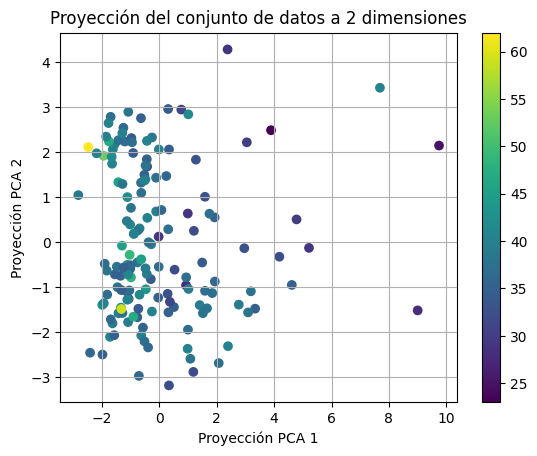

In [24]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Elimina la columna 'ica' correctamente
Datos = preprocessed_dataset.drop(['ica', 'sitios', 'fecha'], axis=1)

# Escalamos los datos antes de aplicar PCA
scaler = StandardScaler()
EJEMPLO_scaled = scaler.fit_transform(Datos)

# Aplicamos PCA con 2 componentes
pca = PCA(n_components=2, whiten=False)
principalComponents = pca.fit_transform(EJEMPLO_scaled)

# Imprimir las formas de los datos antes y después del PCA
print('Antes de PCA: {}'.format(Datos.shape))
print('Después de PCA: {}'.format(principalComponents.shape))

# Graficamos los datos
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=preprocessed_dataset["ica"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.colorbar()
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

Como podemos ver en el scatter plot de la reduccion de dimensionalidad y "pintando" las mediciones con maores o menores valores de su ICA, tenemos indicios de grupos. Veamos como podemos dividirlo.

In [25]:
import pandas as pd
from sklearn.cluster import KMeans

# Suponemos que 'preprocessed_dataset' ya está cargado y contiene la columna 'ica'

ica = preprocessed_dataset['ica']

# Inicializamos el modelo KMeans con 3 clusters
kmeans = KMeans(n_clusters=4, verbose=0, random_state=10)

# Aplicamos KMeans sobre los datos transformados con PCA
kmeans.fit(principalComponents)

# Obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(principalComponents)

# Creamos un DataFrame que contenga la columna 'ica' y los clusters asignados
cluster_df = pd.DataFrame({'x':principalComponents[:, 0], 'y':principalComponents[:, 1], 'Cluster': clusters_kmeans, 'ica': ica})

# Imprimimos los valores de 'ica' para cada uno de los clusters
for cluster_num in range(4):  # El número de clusters es 3, no 4
    print(f"\nCluster {cluster_num}:")
    print(cluster_df[cluster_df['Cluster'] == cluster_num]['ica'].tolist())


Cluster 0:
[39.0, 48.0, 38.0, 37.0, 35.0, 40.0, 35.0, 35.0, 43.0, 44.0, 40.0, 59.0, 35.0, 35.0, 40.0, 41.0, 35.0, 32.0, 37.0, 37.0, 36.0, 49.0, 33.0, 38.0, 35.0, 40.0, 35.0, 45.0, 39.0, 37.0, 40.0, 40.0, 39.0, 40.0, 41.0, 38.0, 35.0, 40.0, 38.0, 37.0, 36.0, 39.0, 47.0, 31.0, 29.0, 34.0, 37.0, 37.0, 34.0, 36.0, 39.0, 36.0, 40.0, 38.0, 34.0, 45.0, 40.0, 39.0, 35.0, 37.0, 37.0, 32.0, 35.0, 41.0, 36.0, 36.0, 35.0]

Cluster 1:
[34.0, 35.0, 37.0, 30.0, 29.0, 30.0, 33.0, 39.0, 28.0, 40.0, 35.0, 32.0, 38.0, 37.0, 33.0, 38.0, 32.0, 23.0, 38.0, 38.0, 39.0, 37.0, 36.0, 39.0, 40.0, 29.0, 37.0, 35.0, 37.0, 32.0, 37.0, 38.0]

Cluster 2:
[28.0, 40.5, 25.0]

Cluster 3:
[53.0, 42.0, 39.0, 35.0, 35.0, 37.0, 37.0, 33.0, 34.0, 33.0, 31.0, 29.0, 34.0, 62.0, 38.0, 37.0, 38.0, 35.0, 37.0, 40.0, 39.0, 34.0, 37.0, 36.0, 34.0, 36.0, 37.0, 45.0, 38.0, 39.0, 40.0, 37.0, 40.0, 47.0, 40.0, 40.0, 40.0, 36.0, 40.0, 40.0, 38.0, 38.5, 41.5, 40.5, 38.5, 40.5, 41.5, 40.5]


c:\Users\kevin\cdd\TrabajoEspecial\entorno\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kevin\cdd\TrabajoEspecial\entorno\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


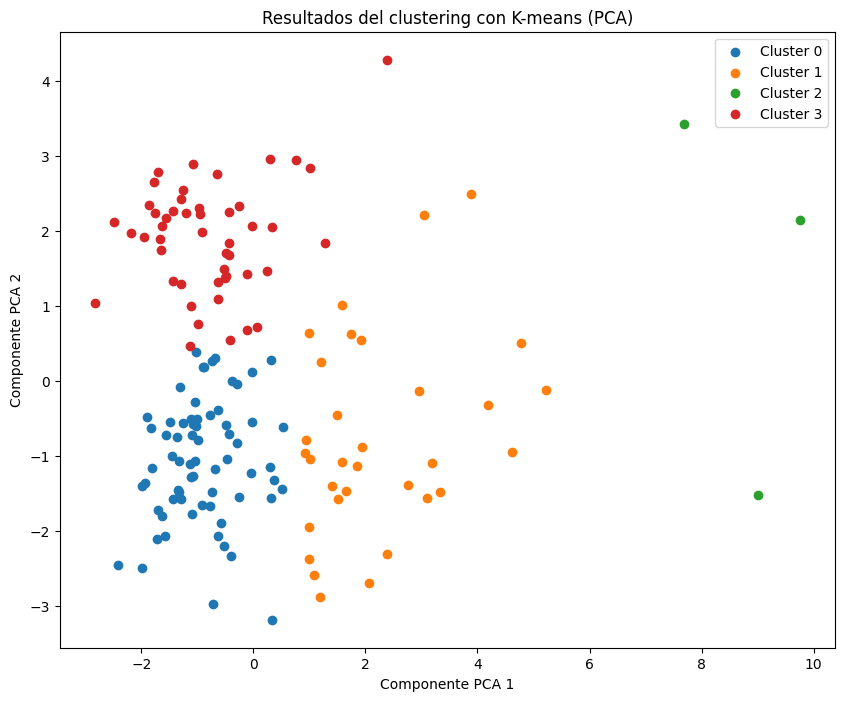

In [26]:
plt.figure(figsize=(10, 8))
for cluster_num in range(4):
  plt.scatter(cluster_df[cluster_df['Cluster'] == cluster_num]['x'], cluster_df[cluster_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.title('Resultados del clustering con K-means (PCA)')
plt.legend()
plt.show()

Dividiendo en 4 grupos, vemos lo siguiente. A primera vista es razonable esta division, chequemoslo respecto a otras posibles cantidades de grupos en los que pudimos haber dividido los datos.

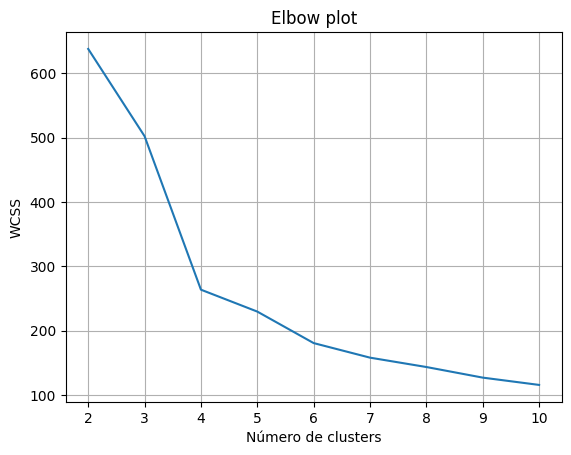

In [27]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Viendo la marcada reduccion en pendiente la funcion, vemos que elegimos un valor razonable de umero de clusters, siguiendo la "regla del codo".

Sin embargo, esto no es suficiente. Debemos evaluar la calidad de estas separaciones, en lo posible, las mediciones deben ser parecidas intra-grupo y diferentes inter-grupos. Chequemos esto con dos tests.

In [28]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# inicializamos listas con los resultados de cada algoritmo y los nombres de los
# algoritmos
clusters_to_compare = [clusters_kmeans]
clustering_methods = ['K-means']

# inicializamos vectores donde iremos guardando los resultados
db_scores = np.zeros(len(clusters_to_compare))
silhouette_scores = np.zeros(len(clusters_to_compare))

# por cada uno de los métodos
for i in range(len(clusters_to_compare)):
  # calculamos las métricas
  db_scores[i] = davies_bouldin_score(principalComponents, clusters_to_compare[i])
  silhouette_scores[i] = silhouette_score(principalComponents, clusters_to_compare[i])
  # las imprimimos
  print(clustering_methods[i])
  print('DB score: {:.4f}'.format(db_scores[i]))
  print('Silhouette score: {:.4f}'.format(silhouette_scores[i]))
  print('----------')

plt.show()

K-means
DB score: 0.7069
Silhouette score: 0.4663
----------


Los valores obtenidos indican buena coherencia, separacion y compactamiento de los grupos, por lo que confirmamos que fue correcto separar los datos en 4 grupos de esta forma.

Tendiendo divisiones factibles, hay que ver como varian numericamente los valores del indice ICA en cada grupo, para esto es efectivo utilizar box plots.

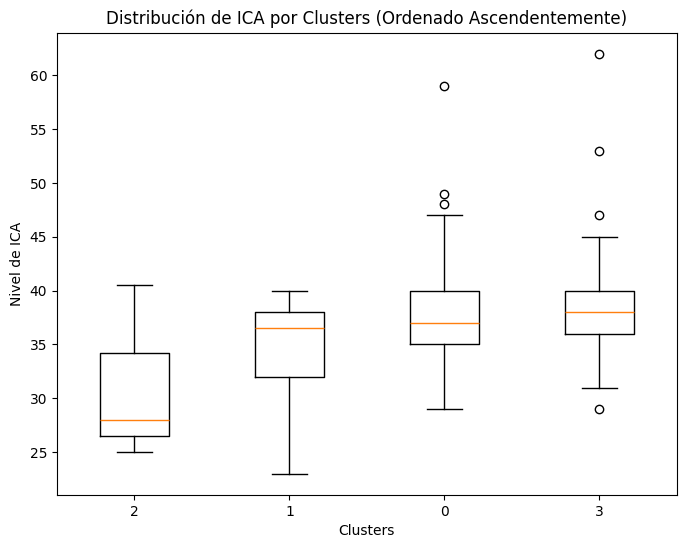

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular la mediana de 'ica' para cada cluster
medianas = [cluster_df[cluster_df['Cluster'] == i]['ica'].median() for i in range(4)]

# Obtener los índices de los clusters ordenados por la mediana ascendentemente
orden_clusters = np.argsort(medianas)

# Reorganizar los boxplots según el orden calculado
plt.figure(figsize=(8, 6))

# Crear una lista de datos de 'ica' para los clusters ordenados por la mediana
plt.boxplot([cluster_df[cluster_df['Cluster'] == i]['ica'] for i in orden_clusters])

# Etiquetas y título
plt.xlabel("Clusters")
plt.ylabel("Nivel de ICA")
plt.title("Distribución de ICA por Clusters (Ordenado Ascendentemente)")

# Etiquetar los números de los clusters ordenados en el eje X
plt.xticks(np.arange(1, 5), labels=orden_clusters)

# Mostrar el gráfico
plt.show()

Teniendo este indicio de grupos diferenciados por su nivel de ICA, podemos chequear la normalidad y homocedastisidad de los datos, asi proseguir con su respectivo test parametrico/no parametrico para probar nuestra hipotesis.

In [30]:
caso_0 = cluster_df[cluster_df["Cluster"] == 0]['ica']
caso_1 = cluster_df[cluster_df["Cluster"] == 1]['ica']
caso_2 = cluster_df[cluster_df["Cluster"] == 2]['ica']
caso_3 = cluster_df[cluster_df["Cluster"] == 3]['ica']

stat, p = shapiro(caso_0)
print(f"Test de Shapiro-Wilk para caso 0: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(caso_1)
print(f"Test de Shapiro-Wilk para caso 1: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(caso_2)
print(f"Test de Shapiro-Wilk para caso 2: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(caso_3)
print(f"Test de Shapiro-Wilk para caso 3: Estadístico={stat:.3f}, p-valor={p:.3f}")


stat, p = stats.levene(caso_0, caso_1, caso_2, caso_3)
print(f"Test de Levene para ICA: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para caso 0: Estadístico=0.872, p-valor=0.000
Test de Shapiro-Wilk para caso 1: Estadístico=0.908, p-valor=0.010
Test de Shapiro-Wilk para caso 2: Estadístico=0.889, p-valor=0.350
Test de Shapiro-Wilk para caso 3: Estadístico=0.810, p-valor=0.000
Test de Levene para ICA: Estadístico=0.295, p-valor=0.829


Los valores obtenidos nos dicen que se trata de una distribucion de datos no normalizada con homocedasticidad, por lo que provaremos nuestra hipotesis con un test Kruskal-Wallis (tambien por tener mas de 2 grupos en consideracion).

In [31]:
stat, p = stats.kruskal(caso_0, caso_1, caso_2, caso_3)

print(f"Test de Kruskal-Wallis para ICA: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el indice de calidad de agua respecto a los clusters encontrados.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el indice de calidad de agua respecto a los clusters encontrados.")

Test de Kruskal-Wallis para ICA: Estadístico=12.952, p-valor=0.005
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el indice de calidad de agua respecto a los clusters encontrados.


---------------------------------------------------------------------------------------------------------------

Hipótesis siguiente: la cantidad de toxinas esta condicionada por diversos factores:

Una de las hipótesis planteadas es que la cantidad de toxinas producidas por las algas podría estar influenciada por varios factores ambientales, tales como el pH, la temperatura del agua (tem_agua), la concentración de nitratos (nitrato_mg_l), el fósforo total (p_total_l_mg_l), la concentración de microcistinas (microcistina_ug_l), y el ph. Estas variables podrían ser afectadas por la presencia de toxinas, o bien, podrían influir en el crecimiento de las algas, lo que, a su vez, impactaría la cantidad de toxinas producidas.

Como primer paso para explorar esta hipótesis, se realiza un análisis descriptivo de los datos utilizando el método describe(), con el fin de obtener una visión general de las características de las variables involucradas y su distribución.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Atributos relevantes
atributos = ['tem_agua', 'nitrato_mg_l', 'p_total_l_mg_l', 'microcistina_ug_l','ph']

estadisticas = preprocessed_dataset[atributos].describe()
print(estadisticas)

         tem_agua  nitrato_mg_l  p_total_l_mg_l  microcistina_ug_l          ph
count  150.000000    150.000000      150.000000         150.000000  150.000000
mean    19.648200      9.238667        0.504967           0.664067    7.351433
std      4.333968      9.951188        0.507900           1.393715    0.701147
min     12.000000      2.000000        0.100000           0.150000    5.310000
25%     17.000000      3.325000        0.210000           0.150000    7.042500
50%     18.500000      5.750000        0.345000           0.150000    7.255000
75%     23.000000     10.500000        0.570000           0.160000    7.545000
max     29.400000     44.000000        3.100000           5.000000   10.500000


Analizamos la distribucion.

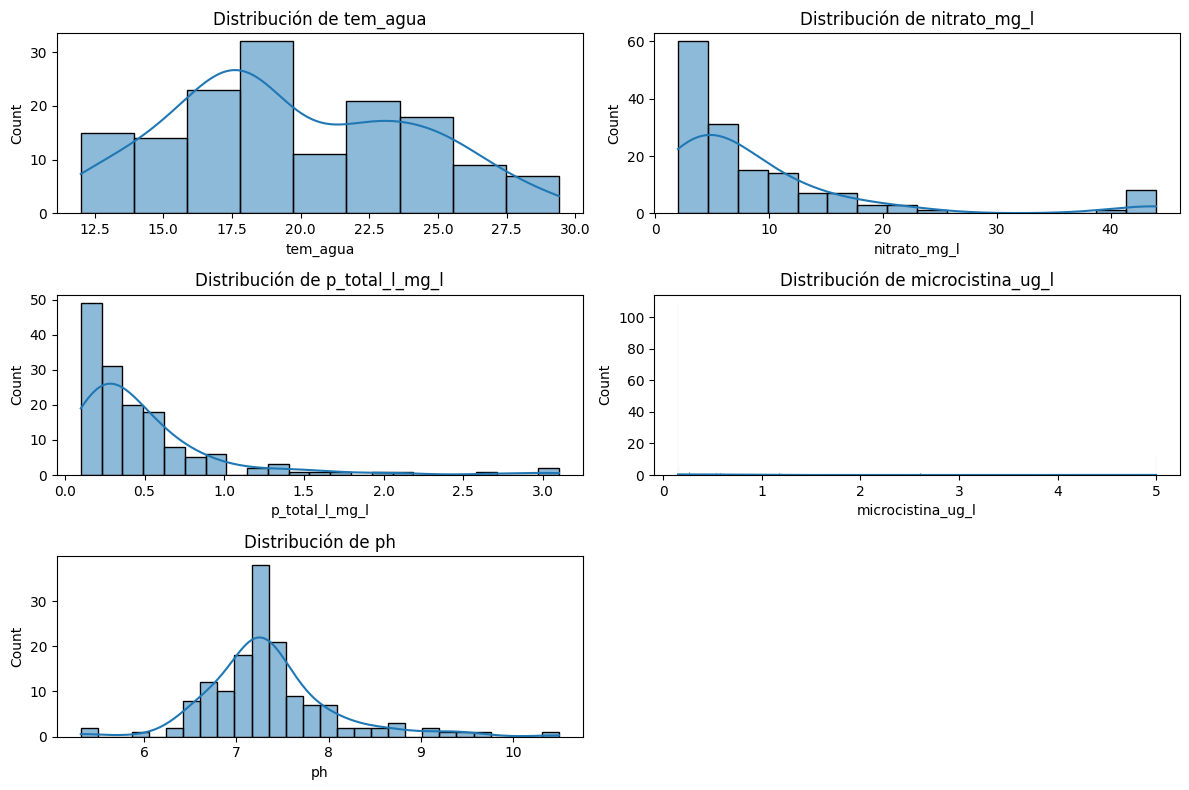

In [33]:
#Histogramas para ver la distribución de cada atributo
plt.figure(figsize=(12, 8))
for i, atributo in enumerate(atributos, 1):
    plt.subplot(3, 2, i)
    sns.histplot(preprocessed_dataset[atributo], kde=True)
    plt.title(f'Distribución de {atributo}')
plt.tight_layout()
plt.show()

Analizamos si existen valores atipicos.

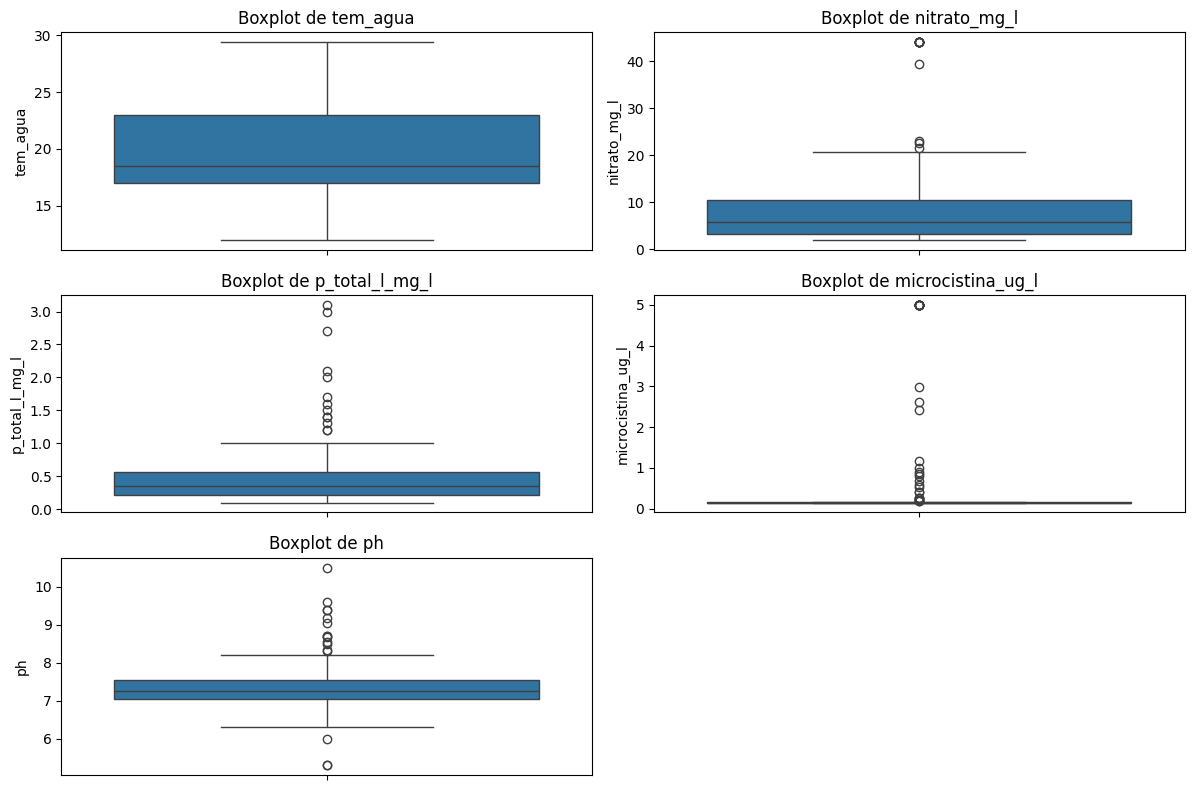

In [34]:
plt.figure(figsize=(12, 8))
for i, atributo in enumerate(atributos, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=preprocessed_dataset, y=atributo)
    plt.title(f'Boxplot de {atributo}')
plt.tight_layout()
plt.show()


Ahora analicemos las correlaciones de las variables para ver si a priori existe alguna relacion lineal.

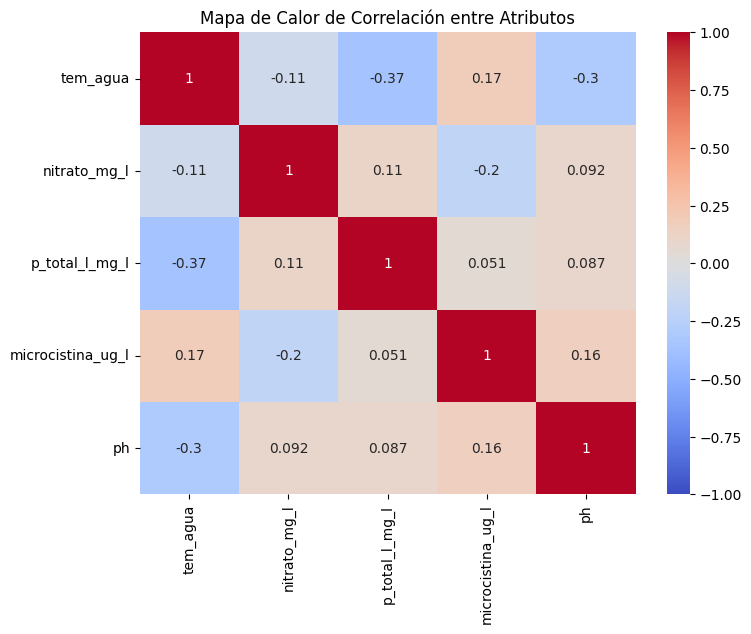

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(preprocessed_dataset[atributos].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación entre Atributos')
plt.show()

Vemos que las correlaciones entre las variables no es muy alta, algo decepcionante, pero podria ser gracias a que comparamos de a pares y que un conjunto de ellas afecte a otra, por lo que podemos aplicar PCA para proyectar a un espacio de dos dimensiones para posteriormente comparar con la variable microsistina.

Antes de PCA: (150, 4)
Después de PCA: (150, 2)


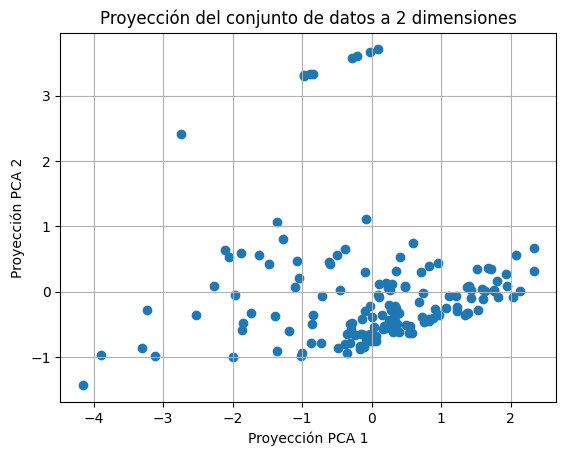

In [36]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
preprocessed_dataset_estandarizado= preprocessed_dataset[atributos].copy()
preprocessed_dataset_estandarizado[atributos]= scaler.fit_transform(preprocessed_dataset_estandarizado[atributos])

data_sin_micro= preprocessed_dataset_estandarizado.drop('microcistina_ug_l', axis=1)


pca = PCA(n_components=2, whiten=False)
# transforme los datos, para ya reducir a dos dimensiones
principalComponents = pca.fit_transform(data_sin_micro)
# imprimimos los tamaños antes y después
print('Antes de PCA: {}'.format(data_sin_micro.shape))
print('Después de PCA: {}'.format(principalComponents.shape))

# graficamos los datos
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

Ahora habiendo reducido la dimension podemos comparar con los valores que toma la variable microsistina.

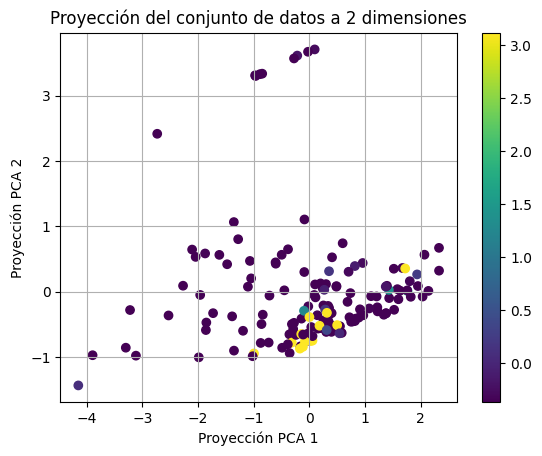

In [37]:
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=preprocessed_dataset_estandarizado["microcistina_ug_l"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()


Los puntos con valores más altos de microcistina (en amarillo) están distribuidos de manera dispersa en el gráfico, con una leve tendencia a concentrarse en la parte derecha e inferior. Sin embargo, no se observa una separación clara entre los valores altos y bajos de microcistina en el espacio reducido de PCA. Esto sugiere que las variables utilizadas en el análisis podrían no estar fuertemente relacionadas con la concentración de microcistina, o bien que existen otros factores adicionales que también están influyendo en su variación. Por lo tanto, esta hipótesis no se puede confirmar y será descartada.

-------------------------------

Hipótesis tentativa: Los niveles elevados de demanda biológica de oxígeno (dbo mg l) están correlacionados con altos niveles de nutrientes como nitrato, fósforo y amonio, ademas de que los indicadores de materia fecal contribuye a esta demanda de oxigeno ya que proliferan los microorganismos. Como primer paso podemos ver las estadísticas descriptivas.

In [38]:
atributos = ['nitrato_mg_l', 'p_total_l_mg_l','dbo_mg_l','nh4_mg_l','escher_coli_ufc_100ml', 'colif_fecales_ufc_100ml', 'enteroc_ufc_100ml']

estadisticas = preprocessed_dataset[atributos].describe()
print(estadisticas)

       nitrato_mg_l  p_total_l_mg_l   dbo_mg_l    nh4_mg_l  \
count    150.000000      150.000000  150.00000  150.000000   
mean       9.238667        0.504967    4.17800    1.961933   
std        9.951188        0.507900    3.51644    3.028460   
min        2.000000        0.100000    2.00000    0.050000   
25%        3.325000        0.210000    2.00000    0.330000   
50%        5.750000        0.345000    3.20000    0.780000   
75%       10.500000        0.570000    4.57500    1.900000   
max       44.000000        3.100000   24.00000   18.000000   

       escher_coli_ufc_100ml  colif_fecales_ufc_100ml  enteroc_ufc_100ml  
count             150.000000               150.000000         150.000000  
mean             5039.022333              7244.412667        1490.255600  
std             16602.737692             16574.366214        3119.373357  
min                 1.500000                 1.000000           1.000000  
25%               327.500000               400.000000         140.

Como se puede observar la diferencia de los valores que toma nitrato con respecto a fosforo y microcistina es muy grande, por lo que mas adelante tendremos que estandarizar o normalizar los datos dependiendo la distribucion que sigan. A continuacion estudiamos mediante graficos que distribucion siguen.

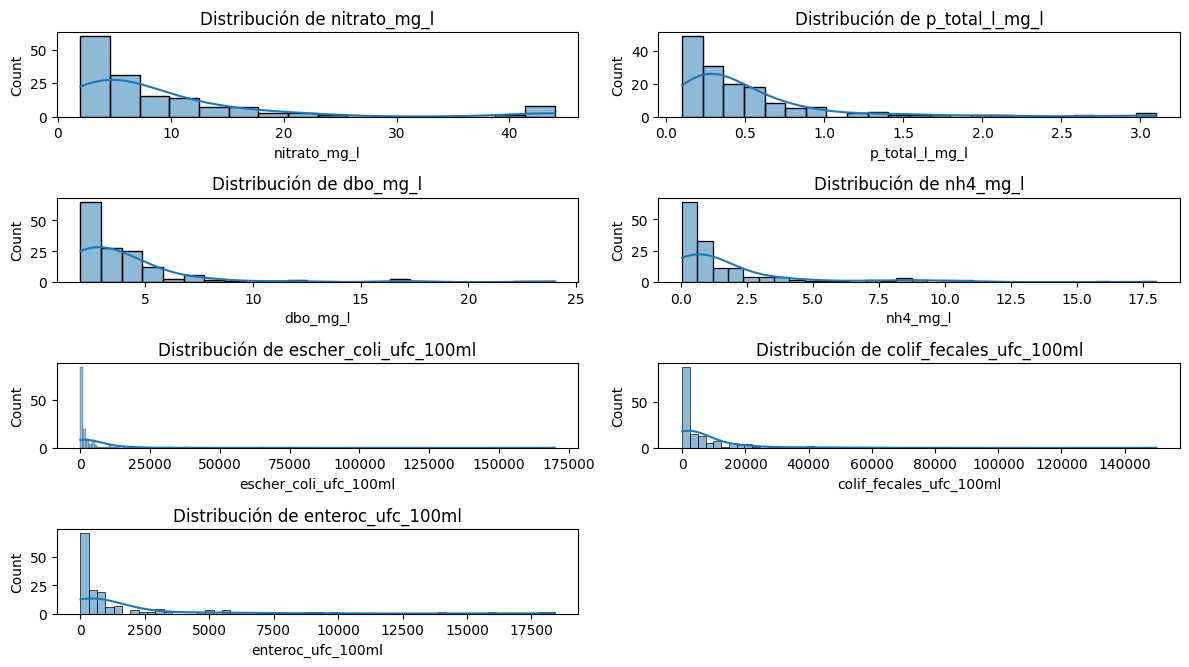

In [39]:
#Histogramas para ver la distribución de cada atributo
plt.figure(figsize=(12, 8))
for i, atributo in enumerate(atributos, 1):
    plt.subplot(5, 2, i)
    sns.histplot(preprocessed_dataset[atributo], kde=True)
    plt.title(f'Distribución de {atributo}')
plt.tight_layout()
plt.show()

Vemos que no tienen una distribucion normal, ahora vamos a analizar los outlier ya que esto influye en la eleccion de herramientas para el analisis.

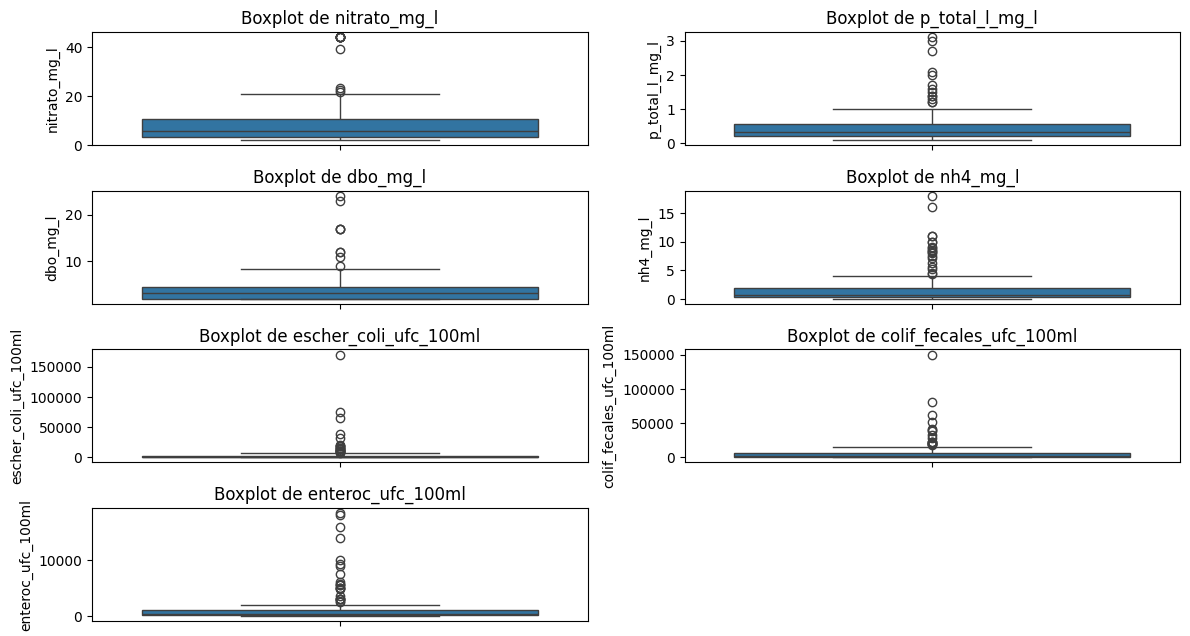

In [40]:
plt.figure(figsize=(12, 8))
for i, atributo in enumerate(atributos, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=preprocessed_dataset, y=atributo)
    plt.title(f'Boxplot de {atributo}')
plt.tight_layout()
plt.show()


Se pueden observar bastantes valores atipicos que no necesariamente son errores en la medicion. Posteriormente vamos a ver si entre estas variables existe alguna relacion lineal, la cual nos motive a seguir por aca.

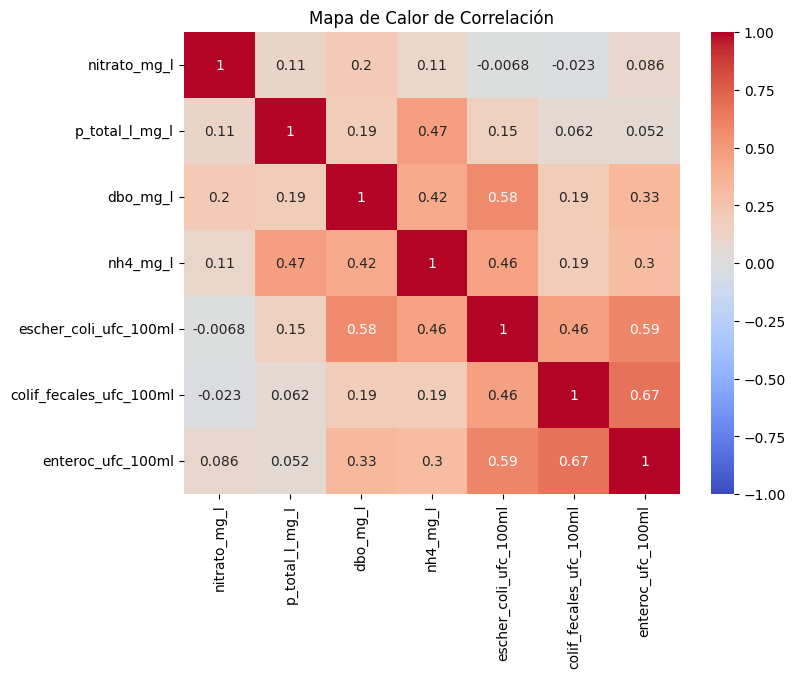

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(preprocessed_dataset[atributos].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()

Antes de PCA: (150, 6)
Después de PCA: (150, 2)


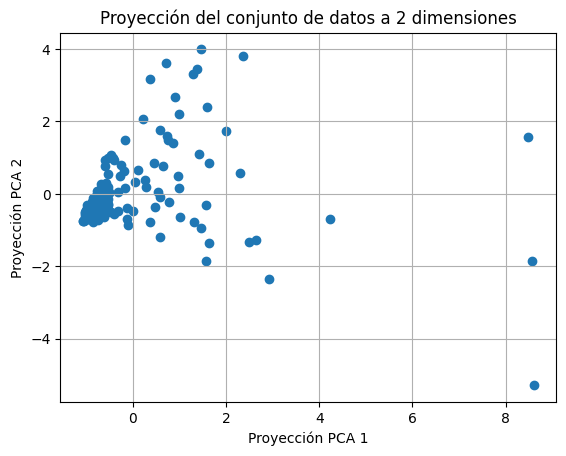

In [42]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
preprocessed_dataset_estandarizado= preprocessed_dataset[atributos].copy()
preprocessed_dataset_estandarizado[atributos]= scaler.fit_transform(preprocessed_dataset_estandarizado[atributos])


data_sin_dbo= preprocessed_dataset_estandarizado.drop('dbo_mg_l', axis=1)

pca = PCA(n_components=2, whiten=False)

principalComponents = pca.fit_transform(data_sin_dbo)
# imprimimos los tamaños antes y después
print('Antes de PCA: {}'.format(data_sin_dbo.shape))
print('Después de PCA: {}'.format(principalComponents.shape))

# graficamos los datos
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

Ahora ya habiendo reducido la dimension de nuestro conjunto de datos, podemos colorear los puntos en base a nuestra variable de interes.

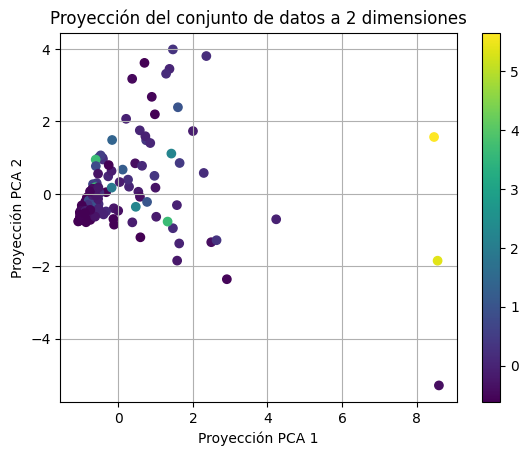

In [43]:
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=preprocessed_dataset_estandarizado["dbo_mg_l"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()


Como se puede observar en el grafico, no existe algun patron que nos motive a seguir con esta hipotesis, por lo que queda descartada.

------------------------------------------

Hipotesis de que la estacion(campaña) favorece la proliferación de vida acuática por ende repercute en la cantidad de oxígeno disuelto(od). Para poder empezar a analizar esta hipotesis podemos separar los datos en dos grupos, uno representando las estaciones que generalmente hace calor y por otro lado en las que hace frio.

In [44]:

copia=preprocessed_dataset.copy()

copia['campaña'] = copia['campaña'].astype(int)

datos_calor  = copia[copia['campaña'].isin([0, 3])]['od']
datos_frio = copia[copia['campaña'].isin([1, 2])]['od']

Posteriormente comprobamos si existe normalidad mediante shapiro para poder elegir que test vamos a utilizar.

In [45]:
from scipy.stats import shapiro
stat, p = shapiro(datos_calor)
print(f"Test de Shapiro-Wilk para clima calido: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(datos_frio)
print(f"Test de Shapiro-Wilk para clima frio: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para clima calido: Estadístico=0.980, p-valor=0.261
Test de Shapiro-Wilk para clima frio: Estadístico=0.980, p-valor=0.276


Segun el test de Shapiro-Wilk, los datos no siguen una distribucion normal, por lo que tendremos que optar por un test no parametrico. Para verlo de manera grafica nos ayudamos con un QQ Plot.

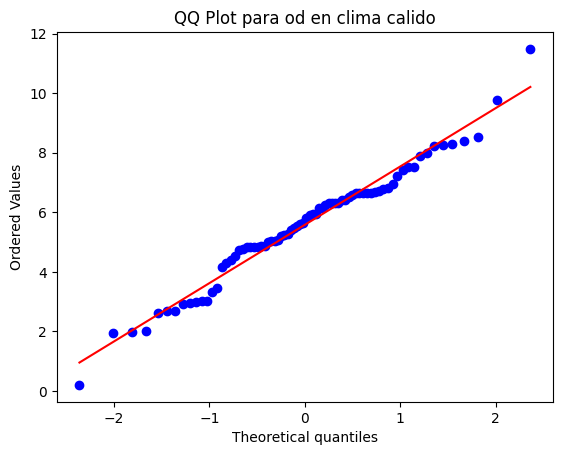

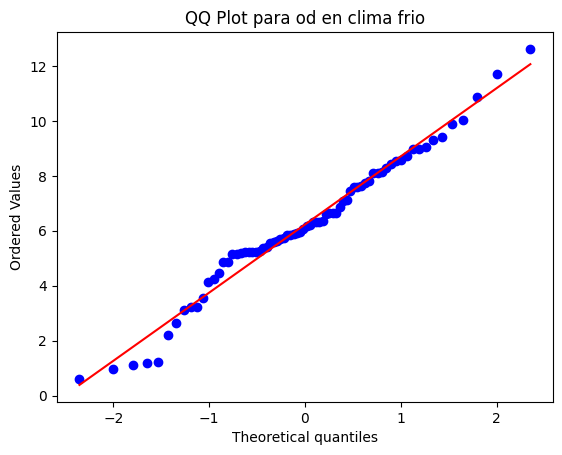

In [46]:
import scipy.stats as stats

# QQ plot para calor
stats.probplot(datos_calor, dist="norm", plot=plt)
plt.title("QQ Plot para od en clima calido")
plt.show()

# QQ plot para frio
stats.probplot(datos_frio, dist="norm", plot=plt)
plt.title("QQ Plot para od en clima frio")
plt.show()

Se puede observar como si bien pareciera seguir una distribucion normal en ciertos momentos se desborda. Ahora bien, vamos a darle una respuesta a nuestra hipotesis utilizando Mann-Whitney

In [47]:
# Test de Mann-Whitney U para comparar el od entre clima calido y clima frio
stat, p = stats.mannwhitneyu(datos_calor, datos_frio)
print(f"Test de Mann-Whitney U para od en distintas estaciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa del od en las distintas estaciones")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa del od en las distintas estaciones")

Test de Mann-Whitney U para od en distintas estaciones: Estadístico=2316.000, p-valor=0.062
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa del od en las distintas estaciones


Concluimos que no hay una diferencia significativa en los niveles de oxígeno disuelto entre las distintas estaciones.Esto indica que si bien podría estar relacionado con las condiciones ambientales de cada estación, como las temperaturas del agua o la actividad biológica, no influye demasiado.

----------------------------

En el dataset podemos observar tres variables que son indicadoras de contaminacion fecal y estan medidas en las mismas unidades. Veamos un analisis bivariado que nos muestre como se relacionan entre ellas.

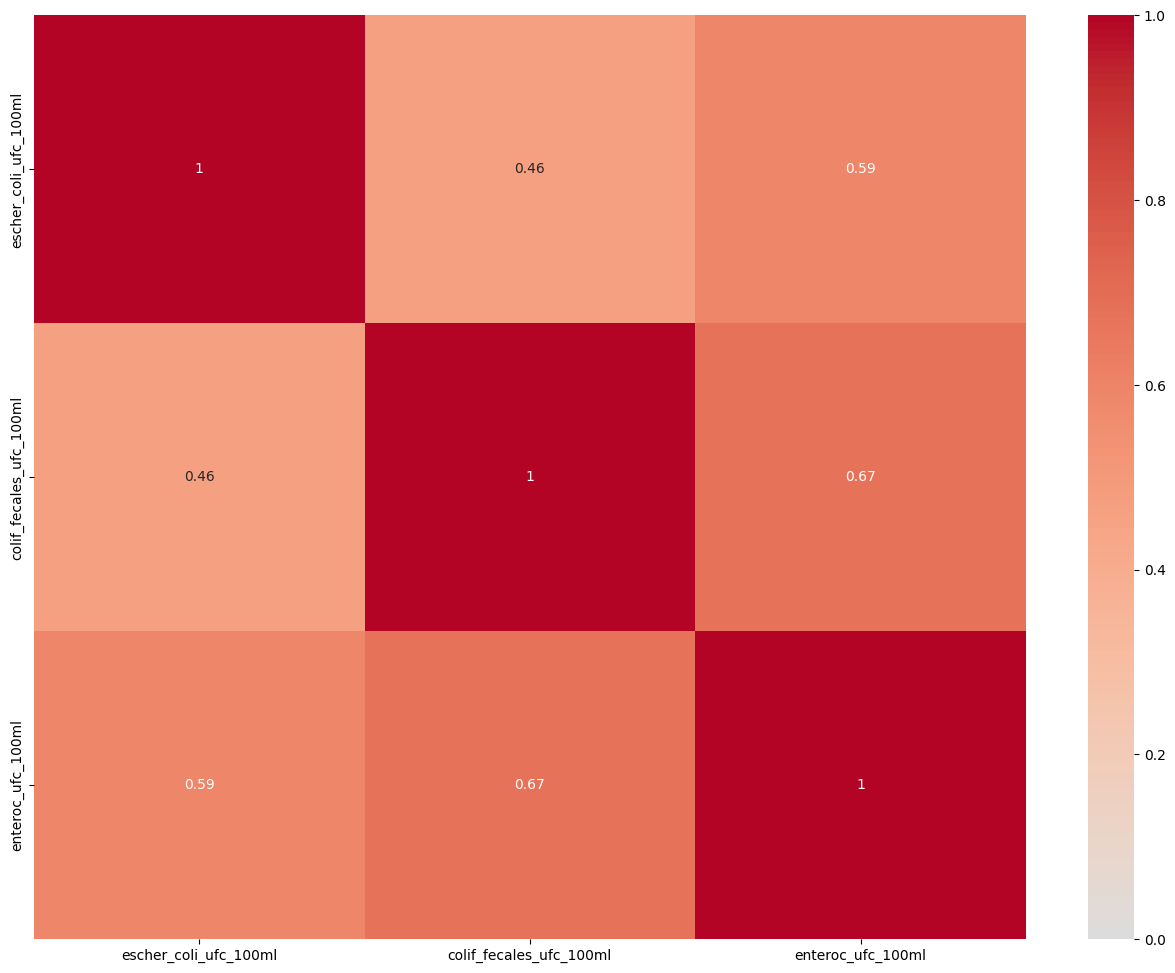

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

caca = ['escher_coli_ufc_100ml', 'colif_fecales_ufc_100ml', 'enteroc_ufc_100ml']

var_cont_fecal = preprocessed_dataset[caca]

bivariado_corr = var_cont_fecal
correlation_matrix = bivariado_corr.corr()

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Como podemos observar estas variables que representan lo mismo, estan lejos de presentar una correlacion positiva fuerte, que es lo que mas tendria sentido. Veamos que esta pasando con estas tres variables, hagamos los scaters plots entre ellas.

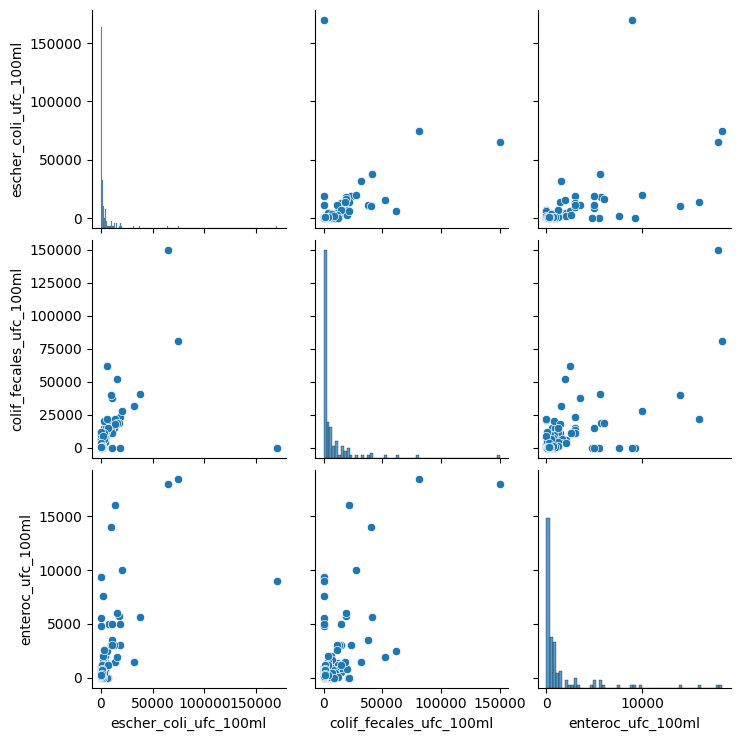

In [54]:
sns.pairplot(var_cont_fecal[caca])
plt.show()

Podemos observar un outlier muy feo en el caso de 'escher_coli_ufc_100ml'. Toma un valor muy grande. Veamoslo en un histograma.

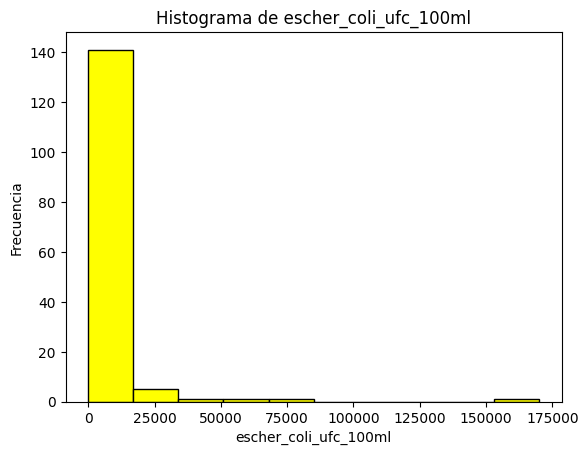

In [55]:
plt.hist(var_cont_fecal['escher_coli_ufc_100ml'], bins=10, color='yellow', edgecolor='black')


plt.xlabel('escher_coli_ufc_100ml')
plt.ylabel('Frecuencia')
plt.title('Histograma de escher_coli_ufc_100ml')
plt.show()

No podemos afirmar demasiado del outlier, ya que carecemos de la informacion necesaria para hacerlo. Obviando este hecho, obtuvimos una nueva hipotesis: La presencia de estas sustancias fecales afectan al indice de calidad de agua (ica)?

In [56]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()
scalded_data = scaler.fit_transform(var_cont_fecal)

# Convertir a DataFrame
scaled_df = pd.DataFrame(scalded_data, columns=var_cont_fecal.columns)
print(scaled_df)

     escher_coli_ufc_100ml  colif_fecales_ufc_100ml  enteroc_ufc_100ml
0                -0.298479                -0.402228          -0.437528
1                -0.171570                -0.244834          -0.231671
2                -0.292436                -0.424021          -0.382847
3                -0.293644                -0.426442          -0.386064
4                -0.280349                -0.378013          -0.478860
..                     ...                      ...                ...
145              -0.286392                -0.420389          -0.431095
146              -0.250133                -0.365906          -0.247754
147              -0.274306                -0.408281          -0.434311
148              -0.256176                -0.390121          -0.363548
149              -0.274306                -0.390121          -0.405363

[150 rows x 3 columns]


Considerando que puede haber relaciones no lineales entre los elementos, utilizamos el metodo de reduccion de dimensionalidad T-SNE.

Before t-SNE: (150, 3)
After t-SNE: (150, 2)


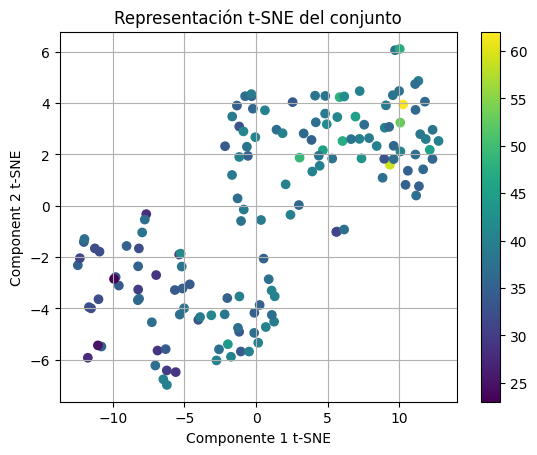

In [57]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, random_state=10).fit_transform(scaled_df)  # con random state
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(scaled_df.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

# graficamos los datos, el color de cada punto representa la calidad del agua
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=preprocessed_dataset["ica"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

Se nota una progresion que va desde izquierda a derecha de la calidad del agua. Esto nos esta diciendo que puede haber algun tipo de relacion NO LINEAL entre estas tres variables que este explicando el ICA.

Ahora intentaremos encontrar que variables predicen a nuestra variable objetivo y estrella del dataset (ica). Para esto vamos a utilizar Regresion lineal con las variables del dataset que creamos puedan a llegar a explicar a ica.

Para eso se debe estandarizar y quitar las variables no utilizadas para el analisis.

In [59]:
#variables no usadas
borrar = ['sitios', 'fecha', 'calidad_de_agua', 'ica']

X = preprocessed_dataset.drop(borrar, axis=1)
y = preprocessed_dataset['ica']

In [60]:
from sklearn.preprocessing import StandardScaler

#estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

Ahora aplicamos Regresion Lineal sobre el nuevo conjunto de datos y la variable objetivo.

In [61]:
import statsmodels.api as sm
# Agregamos una constante como característica, para estimar la ordenada al origen
X_scaled_df_ = sm.add_constant(X_scaled_df)

# Ajustamos el modelo
X_scaled_df_ = X_scaled_df_.reset_index(drop=True)
y = y.reset_index(drop=True)

model = sm.OLS(y, X_scaled_df_).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ica   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     5.603
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           7.97e-11
Time:                        20:34:28   Log-Likelihood:                -401.88
No. Observations:                 150   AIC:                             851.8
Df Residuals:                     126   BIC:                             924.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Los valores obtenidos dicen que se deja mucha varianza sin explicar y que los residuos no generan una distribucion normal, comprobemos esto con un QQ-PLOT.

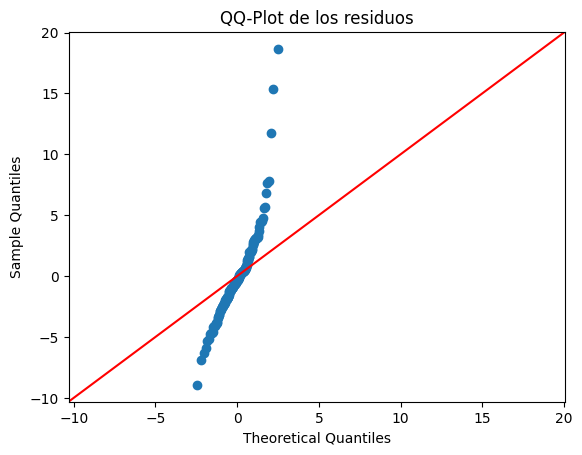

In [62]:
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

De nuevo, no sigue una relacion lineal, esto nos esta indicando que los residuos no siguen una distribucion normal. Veamos que dice el test de Shapiro

In [63]:
from scipy.stats import shapiro

# aplicamos Shapiro-Wilk sobre los residuos
_, p = shapiro(model.resid)
print("p = %.4f" % (p))
# comparamos con el alpha
alpha = 0.05
if p > alpha:
    print("Se distribuyen normal (falló en rechazarse la hipótesis nula)")
else:
    print('No se distribuyen normal (se rechazó la hipótesis nula)')

p = 0.0000
No se distribuyen normal (se rechazó la hipótesis nula)


Volvemos a comprobar, los residuos no se distribuyen de manera normal. Observemos entonces cual es la distribucion que estos llevan.

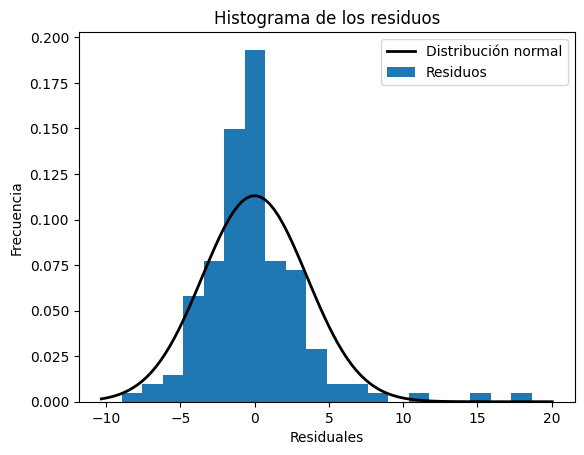

In [64]:
import numpy as np
from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()

Como vemos los residuos no se ajustan los suficiente. Estos resultados sugieren que la relación lineal entre las variables independientes y el ICA no es muy fuerte. Aunque existe cierta relación, el modelo no captura completamente la variabilidad del ICA, lo cual sugiere que podrían existir relaciones no lineales o factores externos que no están representados en el dataset que se nos dio.

Por lo tanto, la hipotesis no se comprueba.